# Bearbeitung des Datensatzes: Inventory

In diesem Jupyter-Notebook wurde auf die frei verfügbaren Daten der Seattle Library zugegriffen. Aufgabenstellung ist, das Datenset auf zwei selbst gewählte Fragen hin zu untersuchen und die Lösungen auf diese Frage durch Python zu implementieren. 

Folgende Fragen werden in diesem Jupyter-Notebook gestellt und beantwortet:

1. Wie ist die Verteilung des Bestands auf die einzelnen Zweigstellen?
2. Wie viele items sind sogenannte "floating"-items?

In [1]:
# Als erstes werden  die nötigen libraries importiert, um den Datensatz bearbeiten und später Grafiken erstellen zu können.

import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Es werden zwei neue Variablen definiert: URL und inventory_file

url = "https://data.seattle.gov/resource/6vkj-f5xf.csv?$limit=5000"
inventory_file = "inventory.csv"

In [5]:
# Nun wird angegeben, wie die Daten downgeloadet werden können. Dazu wird auf urllib.request.urlretrieve aus urllib.request zurückgegriffen. 
# url und inventory_file werden als Positionsargumente übergeben.

urllib.request.urlretrieve(url, inventory_file)

('inventory.csv', <http.client.HTTPMessage at 0x1db53fb2748>)

In [8]:
# Die Daten werden durch Pandas in ein lesbares Format definiert.
inventory = pd.read_csv(inventory_file)

In [9]:
# Nun kann ich mir die Daten anzeigen lassen.
inventory

,bibnum,title,author,isbn,publicationyear,publisher,subjects,itemtype,itemcollection,floatingitem,itemlocation,reportdate,itemcount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,2017-09-01T00:00:00.000,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,2017-09-01T00:00:00.000,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,2017-09-01T00:00:00.000,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,2017-09-01T00:00:00.000,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3285016,"Ether. [Volume 1], Death of the last golden bl...","Kindt, Matt","1506701744, 9781506701745",2017.,"Dark Horse Books,",Adventure and adventurers Comic books strips e...,acbk,nacomic,NaN,uni,2017-09-01T00:00:00.000,1
4996,2903251,Horse heroes / by Mary Pope Osborne and Natali...,"Osborne, Mary Pope","0375870261, 0375970266, 1451786026, 9780375870...",c2013.,"Random House,","Horses Juvenile literature, Animal heroes Juve...",jcbk,ncnf,NaN,rbe,2017-09-01T00:00:00.000,1
4997,2488626,Honeybee : poems & short prose / Naomi Shihab ...,"Nye, Naomi Shihab","0060853905, 0060853913, 9780060853907, 9780060...",2008.,"Greenwillow Books,","Childrens poetry American, American poetry Juv...",jcbk,ncnf,NaN,bal,2017-09-01T00:00:00.000,1
4998,3099421,Planets / Kate Riggs.,"Riggs, Kate","1608184846, 9781608184842",[2015],"Creative Education,","Planets Juvenile literature, Solar system Juve...",jcbk,ncenf,NaN,mag,2017-09-01T00:00:00.000,1


## 1. Frage: Wie ist die Verteilung des Bestands auf die einzelnen Zweigstellen?

Diese Frage ist im Zuge der Bestandspflege interessant. Das Ergebnis gibt mir zum Beispiel Aufschluss darüber, wie sich prozentual der Etat auf die Zweigstellen verteilen könnte. In Kombination mit anderen Werten, wie die Ausleihzahlen und die Besucherzahlen, ergeben sich Erkenntnisse darüber, ob der Bestand sinnvoll verteilt ist oder je nach Zweigstelle Bestand aufgestockt oder abgebaut werden sollte.

In dem Beispiel hier wird nur von den bereits ersichtlichen locations ausgegangen. Im Optimalfall sind mir die Zweigstellen meiner Bibliothek bekannt und ich kann alle Kürzel in meine Suche einbeziehen. 

In [12]:
# Als erstes lasse ich mir Werte aus der Spalte "itemlocation" anzeigen, 
# um zu ermitteln welche materialtypes grunsätzlich vorliegen. 

inventory['itemlocation']

0       qna
1       lcy
2       bea
3       cen
4       cen
       ... 
4995    uni
4996    rbe
4997    bal
4998    mag
4999    dth
Name: itemlocation, Length: 5000, dtype: object

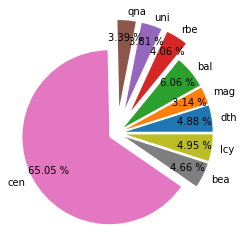

In [11]:
# Aus dem gesamten Dataset kann ich durch diesen Befehl alle itemlocation-Einträge herausfiltern. 
# Diese werden über den Befehlt count()[0] gezählt.

dth = inventory.loc[inventory['itemlocation'] == 'dth'].count()[0]
mag = inventory.loc[inventory['itemlocation'] == 'mag'].count()[0]
bal = inventory.loc[inventory['itemlocation'] == 'bal'].count()[0]
rbe = inventory.loc[inventory['itemlocation'] == 'rbe'].count()[0]
uni = inventory.loc[inventory['itemlocation'] == 'uni'].count()[0]
qna = inventory.loc[inventory['itemlocation'] == 'qna'].count()[0]
cen = inventory.loc[inventory['itemlocation'] == 'cen'].count()[0]
bea = inventory.loc[inventory['itemlocation'] == 'bea'].count()[0]
lcy = inventory.loc[inventory['itemlocation'] == 'lcy'].count()[0]

# Im nächsten Schritt möchte ich daraus ein Kreisdiagramm erstellen. Ich definieren die Beschriftung. 
# Über explode lege ich die Abstände zwischen den einzelnen "Kuchenstücke" im Diagramm fest und hilft so bei der Lesbarkeit.

labels = ['dth', 'mag', 'bal', 'rbe', 'uni', 'qna', 'cen', 'bea', 'lcy']
explode = (.1,.1,.1,.3,.3,.3,.1,.1,.1)

# In plt.pie gebe ich die Variablen an und füge noch eine Prozentangabe hinzu. Außerdem gebe ich dem Diagramm einen Titel.
plt.pie([dth, mag, bal, rbe, uni, qna, cen, bea, lcy], labels = labels, autopct='%.2f %%', pctdistance=0.8, explode=explode)

plt.show()

## 2. Frage: Wie viele items sind sogenannte "floating"-items?

Bei sogenannten Floating Collections hat ein fest definierter Bestand keinen festen Heimatstandort und wird dem Gesamtsystem zugeordnet. Das bedeutet, dass bei Rückgabe in einer Zweigstelle kein Transport des Mediums mehr nötig ist, sondern das Medium wird in der Bibliothek der Rückgabestelle dem Bestand zugeführt und für die Ausleihe bereitgestellt. Vorteile sind die wegfallende Logistik (Zeit und Kosten), sowie ein sich ständig wandelnder Bestand.

Aus statistischen Gründen kann es interessant sein, sich die Anzahl der bestehenden floating items anzeigen zu lassen. 

In [13]:
# Hierfür suche ich ähnlich wie beim Erstellen des Kuchendiagramms in der Spalte floatingitem nach dem Begriff "Floating".
# Dieses mal lasse ich mir die Zahl direkt ausgeben.

Floating = inventory.loc[inventory['floatingitem'] == 'Floating'].count()[0]

Floating

798